In [2]:
import numpy as np
from matplotlib import pyplot as plt 
from scipy import signal
from sympy.abc import s
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot

### Problem 1 (c)

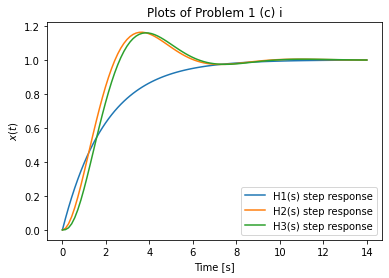

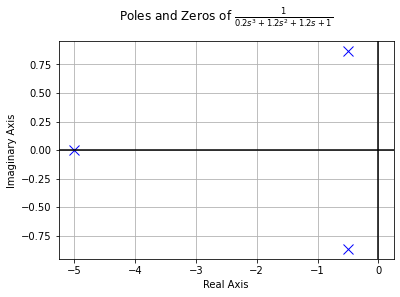

In [3]:
# i
tau = 0.2 # s
Wn = 1 # rad/s
damping_ratio = 0.5
Kb = 1

num = [1]
den = [tau, 1]
h1 = signal.lti(num, den)
t, H1_s = signal.step(h1)

num = [Wn**2]
den = [1, 2 * damping_ratio * Wn, Wn**2]
h2 = signal.lti(num, den)
t, H2_s = signal.step(h2)

# define transfer function
num = [Wn**2 * Kb]
den = [tau, 2 * tau * damping_ratio * Wn + 1, tau * Wn**2 + 2 * damping_ratio * Wn, Wn**2]
h3 = signal.lti(num, den)
t, H3_s = signal.step(h3)

plt.plot(t, H1_s, label = "H1(s) step response")
plt.plot(t, H2_s, label = "H2(s) step response")
plt.plot(t, H3_s, label = "H3(s) step response")
plt.title("Plots of Problem 1 (c) i")
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('$x(t)$')
plt.show()
# plt.savefig("Pset3_third_order1.svg", format="svg")

tf_h3 = TransferFunction(Wn**2 * Kb ,
                         tau * s**3 + 
                         (2 * tau * damping_ratio * Wn + 1) * s**2 + 
                         (tau * Wn**2 + 2 * damping_ratio * Wn) * s + Wn**2, s)
pole_zero_plot(tf_h3)   

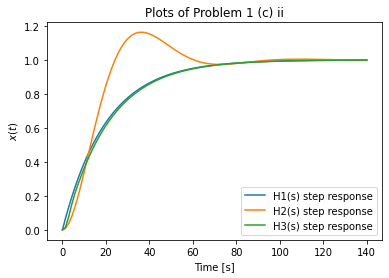

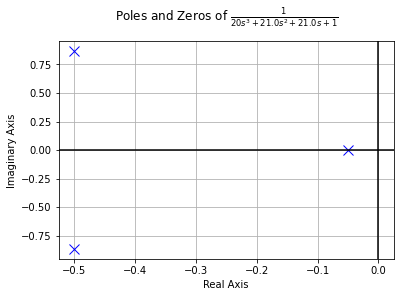

In [4]:
# ii
tau = 20 # s
Wn = 1 # rad/s
damping_ratio = 0.5
Kb = 1

num = [1]
den = [tau, 1]
h1 = signal.lti(num, den)
t, H1_s = signal.step(h1)

num = [Wn**2]
den = [1, 2 * damping_ratio * Wn, Wn**2]
h2 = signal.lti(num, den)
t, H2_s = signal.step(h2)

# define transfer function
num = [Wn**2 * Kb]
den = [tau, 2 * tau * damping_ratio * Wn + 1, tau * Wn**2 + 2 * damping_ratio * Wn, Wn**2]
h3 = signal.lti(num, den)
t, H3_s = signal.step(h3)

plt.plot(t, H1_s, label = "H1(s) step response")
plt.plot(t, H2_s, label = "H2(s) step response")
plt.plot(t, H3_s, label = "H3(s) step response")
plt.title("Plots of Problem 1 (c) ii")
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('$x(t)$')
plt.show()
# plt.savefig("Pset3_third_order1.svg", format="svg")

tf_h3 = TransferFunction(Wn**2 * Kb , 
                         tau * s**3 + 
                         (2 * tau * damping_ratio * Wn + 1) * s**2 + 
                         (tau * Wn**2 + 2 * damping_ratio * Wn) * s + 
                         Wn**2, s)
pole_zero_plot(tf_h3)   

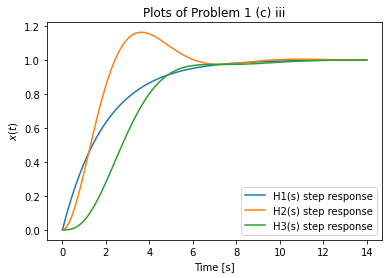

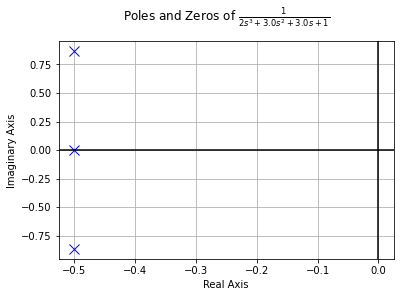

In [5]:
# iii
tau = 2 # s
Wn = 1 # rad/s
damping_ratio = 0.5
Kb = 1

num = [1]
den = [tau, 1]
h1 = signal.lti(num, den)
t, H1_s = signal.step(h1)

num = [Wn**2]
den = [1, 2 * damping_ratio * Wn, Wn**2]
h2 = signal.lti(num, den)
t, H2_s = signal.step(h2)

# define transfer function
num = [Wn**2 * Kb]
den = [tau, 2 * tau * damping_ratio * Wn + 1, tau * Wn**2 + 2 * damping_ratio * Wn, Wn**2]
h3 = signal.lti(num, den)
t, H3_s = signal.step(h3)

plt.plot(t, H1_s, label = "H1(s) step response")
plt.plot(t, H2_s, label = "H2(s) step response")
plt.plot(t, H3_s, label = "H3(s) step response")
plt.title("Plots of Problem 1 (c) iii")
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('$x(t)$')
plt.show()
# plt.savefig("Pset3_third_order1.svg", format="svg")

tf_h3 = TransferFunction(Wn**2 * Kb , 
                         tau * s**3 + (2 * tau * damping_ratio * Wn + 1) * s**2 + 
                         (tau * Wn**2 + 2 * damping_ratio * Wn) * s + 
                         Wn**2, s)
pole_zero_plot(tf_h3)   

### Problem 2 (f)

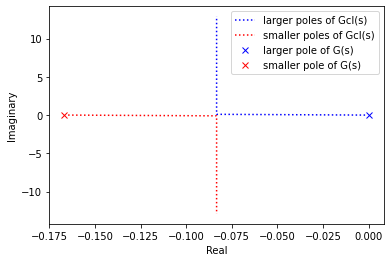

<Figure size 432x288 with 0 Axes>

In [6]:

m = 3
b = 0.5
start_K = 0.001
end_K = 500
K_prop_ctrl = np.linspace(start_K, end_K, 10000)
lambda1 = []
lambda2 = []

# Gcl_s = (m * s ** 2 + b * s) / (m * s ** 2 + b * s + K_prop_ctrl)
# lambda = (-b + np.sqrt(b**2 - 4 * m * K_prop_ctrl)) / (2 * m)

for item in K_prop_ctrl:
    lambda1.append((-b + np.sqrt(b**2 - 4 * m * item + 0j)) / (2 * m))
    lambda2.append((-b - np.sqrt(b**2 - 4 * m * item + 0j)) / (2 * m))

np_lambda1 = np.array(lambda1)
np_lambda2 = np.array(lambda2)

plt.plot(np_lambda1.real,np_lambda1.imag, 'b:', label = 'larger poles of Gcl(s)')
plt.plot(np_lambda2.real,np_lambda2.imag, 'r:', label = 'smaller poles of Gcl(s)')
plt.plot(0, 0, 'bx', label = 'larger pole of G(s)')
plt.plot(- b / m, 0, 'rx', label = 'smaller pole of G(s)')
plt.legend()
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()
plt.savefig("Gcl(s).svg", format="svg")